In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/Unicorn_Companies.csv")

In [ ]:
data

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/2017,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/2012,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/2018,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/2014,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/2011,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
...,...,...,...,...,...,...,...,...,...,...
1069,Zhaogang,$1B,6/29/2017,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,$379M,"K2 Ventures, Matrix Partners China, IDG Capital"
1070,Zhuan Zhuan,$1B,4/18/2017,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,$990M,"58.com, Tencent Holdings"
1071,Zihaiguo,$1B,5/6/2021,Consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital ..."
1072,Zopa,$1B,10/19/2021,Fintech,London,United Kingdom,Europe,2005,$792M,"IAG Capital Partners, Augmentum Fintech, North..."


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country           1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [4]:
data.isnull().sum()

,0
Company,0
Valuation,0
Date Joined,0
Industry,0
City,16
Country,0
Continent,0
Year Founded,0
Funding,0
Select Investors,1


In [5]:
#drop null value rows

data.dropna(how='any', inplace=True)
data.isnull().sum()

,0
Company,0
Valuation,0
Date Joined,0
Industry,0
City,0
Country,0
Continent,0
Year Founded,0
Funding,0
Select Investors,0


In [7]:
data.isnull().sum()

,0
Company,0
Valuation,0
Date Joined,0
Industry,0
City,0
Country,0
Continent,0
Year Founded,0
Funding,0
Select Investors,0


In [8]:
#top 10 largest valuation company

# convert values of column to numeric
data['Valuation'] = data['Valuation'].astype(str).str.replace('$', '').str.replace('B', '')
data['Valuation'] = pd.to_numeric(data['Valuation'])
# sort data by column "Valuation"
data = data.sort_values(by='Valuation', ascending=False)
# print top 10 data
print(data.head(10))

        Company  Valuation Date Joined                             Industry  \
0     Bytedance        180    4/7/2017              Artificial intelligence   
1        SpaceX        100   12/1/2012                                Other   
2         SHEIN        100    7/3/2018      E-commerce & direct-to-consumer   
3        Stripe         95   1/23/2014                              Fintech   
4        Klarna         46  12/12/2011                              Fintech   
5         Canva         40    1/8/2018         Internet software & services   
6  Checkout.com         40    5/2/2019                              Fintech   
7     Instacart         39  12/30/2014  Supply chain, logistics, & delivery   
8     JUUL Labs         38  12/20/2017                    Consumer & retail   
9    Databricks         38    2/5/2019          Data management & analytics   

            City         Country      Continent  Year Founded Funding  \
0        Beijing           China           Asia          

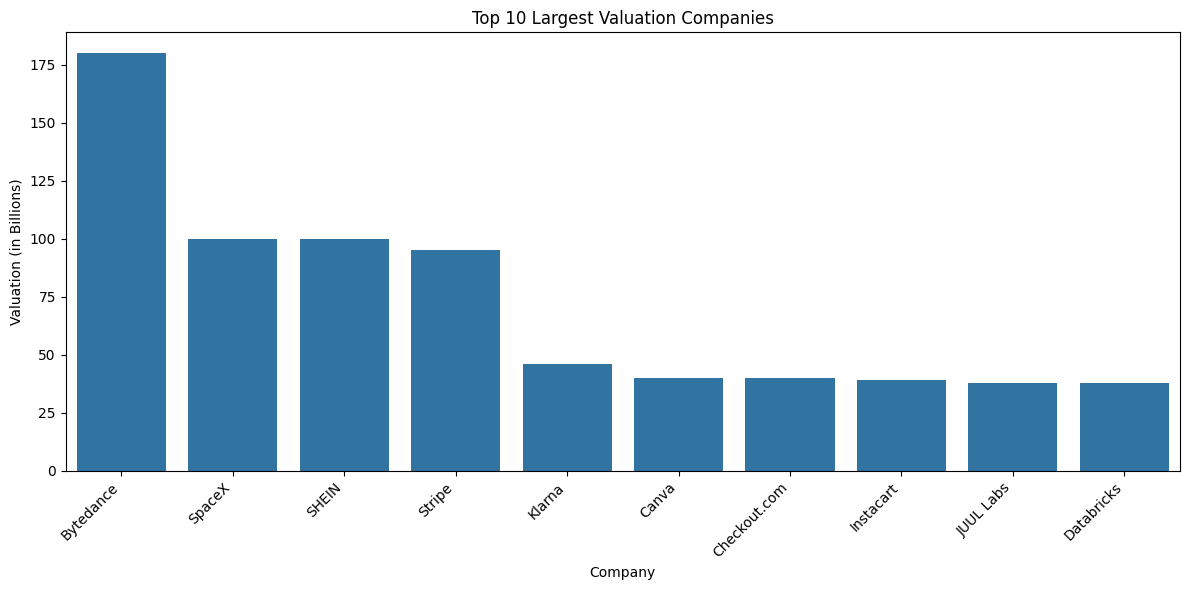

In [ ]:
# prompt: plot a graph for top 10 valuation company

# get top 10 data
top_10_data = data.head(10)
# plot graph
plt.figure(figsize=(12, 6))
sns.barplot(x='Company', y='Valuation', data=top_10_data)
plt.title('Top 10 Largest Valuation Companies')
plt.xlabel('Company')
plt.ylabel('Valuation (in Billions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# prompt: which country has most unicorn companies

country_counts = data['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Number of Unicorns']
most_unicorns_country = country_counts.loc[country_counts['Number of Unicorns'].idxmax()]
print(f"The country with the most unicorn companies is: {most_unicorns_country['Country']} with {most_unicorns_country['Number of Unicorns']} unicorns.")

The country with the most unicorn companies is: United States with 562 unicorns.


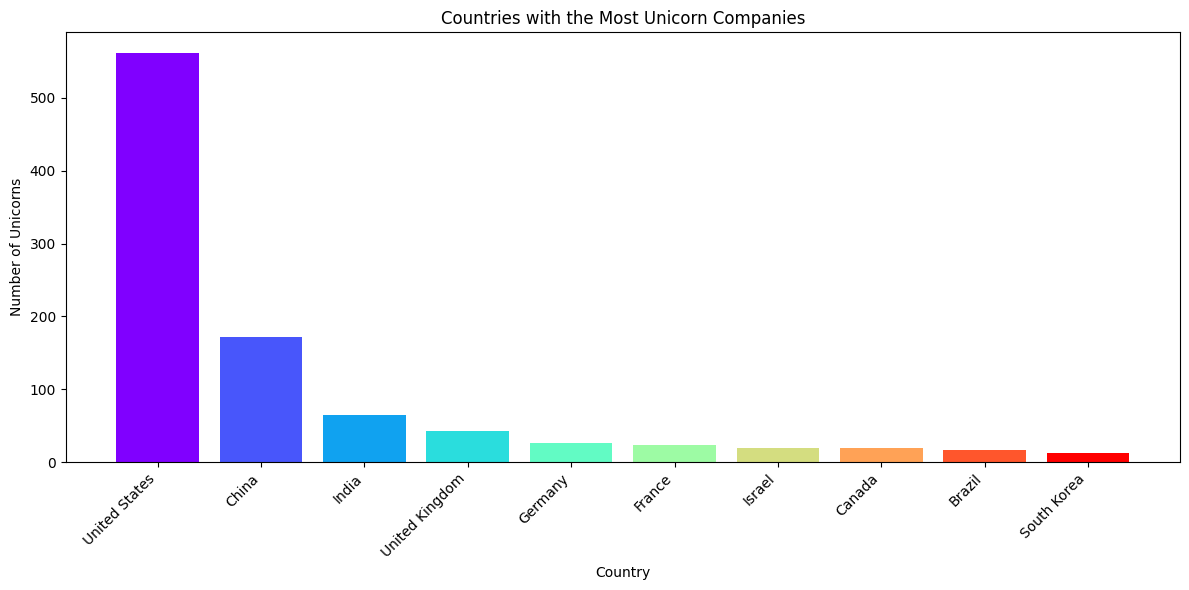

In [ ]:
# Count the number of unicorn companies per country
country_counts = data['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Number of Unicorns']

# Select top N countries (e.g., top 10)
top_countries = country_counts.head(10)

# Create a rainbow colormap
colors = plt.cm.rainbow(np.linspace(0, 1, len(top_countries)))

# Plot the bar graph
plt.figure(figsize=(12, 6))
plt.bar(top_countries['Country'], top_countries['Number of Unicorns'], color=colors)
plt.title('Countries with the Most Unicorn Companies')
plt.xlabel('Country')
plt.ylabel('Number of Unicorns')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The year with the most unicorn companies is: 2021 with 507 unicorns.


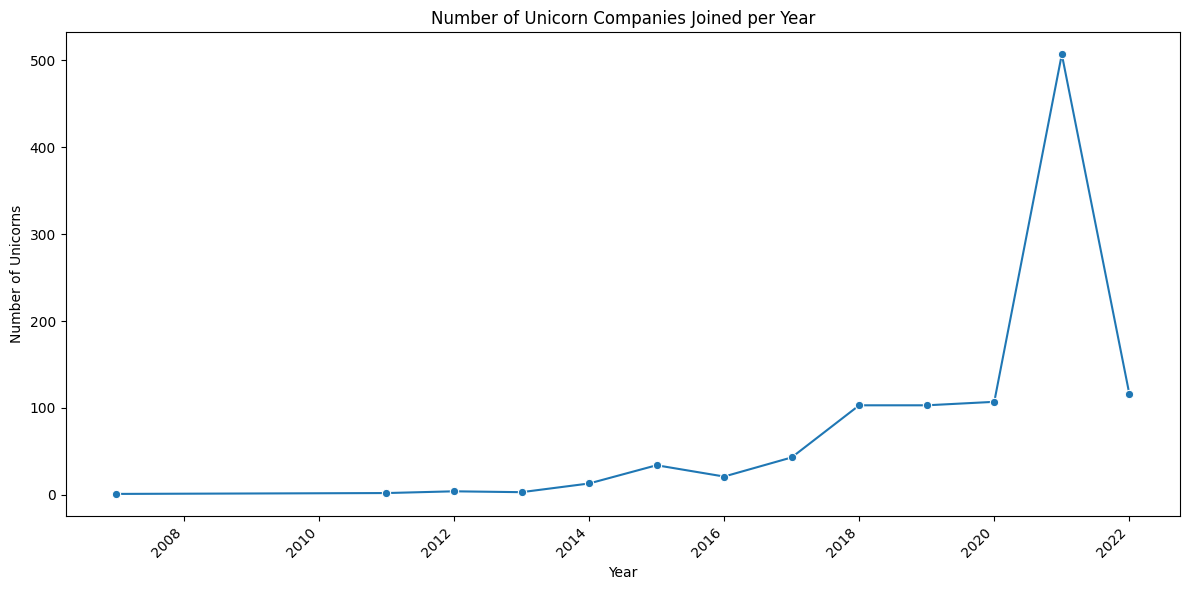

In [10]:
# prompt: how to check which year unicorns made most

# Ensure the 'year' column exists or create it if it doesn't
# Assuming the date format in 'Date Joined' is consistent, like 'YYYY-MM-DD' or 'MM/DD/YYYY'
# If the format is different, we might need to adjust the date parsing.
if 'Date Joined' in data.columns:
    data['Year Joined'] = pd.to_datetime(data['Date Joined']).dt.year

    if 'Year Joined' in data.columns:
        # Count the number of unicorns per year
        year_counts = data['Year Joined'].value_counts().reset_index()
        year_counts.columns = ['Year', 'Number of Unicorns']

        # Find the year with the maximum number of unicorns
        year_with_most_unicorns = year_counts.loc[year_counts['Number of Unicorns'].idxmax()]

        print(f"The year with the most unicorn companies is: {int(year_with_most_unicorns['Year'])} with {year_with_most_unicorns['Number of Unicorns']} unicorns.")

        # Plot the number of unicorns per year
        plt.figure(figsize=(12, 6))
        sns.lineplot(x='Year', y='Number of Unicorns', data=year_counts, marker = 'o')
        plt.title('Number of Unicorn Companies Joined per Year')
        plt.xlabel('Year')
        plt.ylabel('Number of Unicorns')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print("Could not create 'Year Joined' column. Please check the format of the 'Date Joined' column.")
else:
    print("The 'Date Joined' column does not exist in the DataFrame.")